# 정리를 하다가 말다가 해서 자세한건 책에 다 나와 았습니다.

## 6.3 로지스틱 회귀
**로지스틱 회귀** 는 확률분포에서 이항분포를 사용, 링크함수로 *로짓함수*를 사용한 일반선형모델이다.\
독립변수는 여러여도, 연속형, 카테고리형 섞여있어도 상관없다.

### 6.3.3 로짓함수
**로짓함수** 로그의 밑은 $e$ 이다.\
#### $f(x) = \log\left(\frac{x}{1-x}\right)$

### 6.3.4 역함수
$f(a)=b$ 가 있다고 예를 들면, 이때 $a$와 $b$를 반대로 해서 $g(b)=a$가 되는 함수$g(x)$를 $f(x)$의 **역함수** 라고 한다.\
$ex)$ 지수함수의 역함수는 로그함수이다.

### 6.3.5 로지스틱함수
**로지스틱함수**는 로짓함수의 역함수이다.\
로짓함수를 $f(x)$라고 하면 $g(f(x))=x$가 된다.
#### $g(y)=\frac{1}{1+exp(-y)}$

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

### 6.3.10 데이터 일고 그래프 그리기
데이터는 가공의 시험 합격 여부 데이터이다.
hours가 공부시간, result가 시험의 합격여부임 (합: 1, 불: 0)

In [2]:
test_result = pd.read_csv('../input/lm-model/6-3-1-logistic-regression.csv')
test_result.head()

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


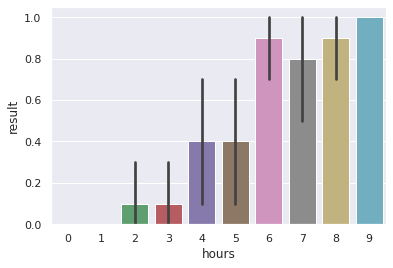

In [3]:
# 합:1, 불합:0 이므로 평균이 합격률이라고 볼 수 있다.
sns.barplot(x='hours', y='result', data=test_result);

In [4]:
# 공부시간이 길어지면 합격률이 높아지는것 같다.
# 공부시간마다의 합격률을 계산해본다.
test_result.groupby('hours').mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


### 6.3.11 로지스틱 회귀
로지스틱 회귀모델 추정

In [5]:
mod_glm = smf.glm(formula='result~hours', data=test_result, family=sm.families.Binomial()).fit()

- 일반선형모델(로지스틱이든 아니든)을 추정하는 경우 smf.glm 을 사용한다.
- 파라미터
 - 첫번째 'result~hours' 는 공식. 정규선형모델과 똑같이 사용.
 - 두번째 대상이 되는 **DataFrame** 사용
 - 세번째 확률분포 지정. 이항분포로 지정했으므로 sm.families.Binomial()이 된다.

- 푸아송 분포로 지정시 sm.families.Possion()이 된다.
- 링크함수 미지정시 
 - 이항분포는 기본으로 **logit함수**가 지정된다.
 - 푸아송 분포는 자동으로 **log**함수가 지정된다.
 - 기본 링크함수는 확률분포에 따라 자동 선택된다.

- family=sm.families.Binomial(link=sm.families.links.logit) 이라고 명시적으로 지정할 수도 있다.

In [6]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sat, 17 Sep 2022   Deviance:                       68.028
Time:                        15:39:33   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

- Method: IRLS $rightarrow$ 반복적인 Iterative Reweigted Least Square(최소제곱법)의 약자이다.
- No. Iterations: 6 $rightarrow$ 내부에서 계산한 반복수
- Deviance 와 Pearson chi2 $rightarrow$ 이 모델의 적합도를 나타내는 지표
- 계수에 대해서는 t-test 대신 Wald-test 검정 결과가 출력됨

### 6.3.13 모델 선택
AIC를 사용 Null 모델과 독립변수 공부시간이 있는 모델 중 좋은 모델을 비교

In [7]:
# 1. null 모델 추정
mod_glm_null = smf.glm('result~1', data=test_result, family=sm.families.Binomial()).fit()

# AIC 비교
print('Null 모델      : ', mod_glm_null.aic.round(3))
print('변수가 있는 모델: ', mod_glm.aic.round(3))

Null 모델      :  139.989
변수가 있는 모델:  72.028


그래프와 평균합격률, AIC 와 Null모델의 비교에서도 공부시간이라는 변수는 합격률을 예측하는데 도움이 된다고 얘기하고 있다.\
공부시간 계수가 양수였던 점도 감안하면 공부시간을 늘리면 합격률이 오른다고 판단해도 괜찮을 것 같다.

### 6.3.14 로지스틱 회귀곡선 그래프
가로축에 공부시간, 세로축에 합격 여부의 이항확률변수를 지정한 산포도를 그리고, 이론상의 합격률을 겹쳐본다.

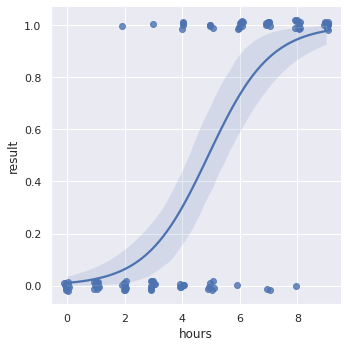

In [8]:
# seaborn.lmplot의 파라미터를 logistic=True로 넘긴다.
sns.lmplot(x='hours', y='result', data=test_result, logistic=True,
           # x_jitter, y_jitter 는 산포도를 그리는 데이터의 점을 조금 위아래로 흩어지게 하는 설정
           x_jitter=0.1, y_jitter=0.02);

### 6.3.15 성공확률 예측
합격률을 수치로 얻을 수도 있다.

In [9]:
# 0~9까지 1씩 증가시키는 등차수열
exp_val = pd.DataFrame({'hours': np.arange(0,10,1)})

# 성공확률의 예측치
pred = mod_glm.predict(exp_val) # round(0) 으로 하면 0.5 이상 반올림  0,1로 예측값이 나온다.
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 6.3.16 용어 설명
- **오즈(odds)**
 실패보다 성공이 몇 배 더 쉬운가를 나타내는 것.\
 $p$ 는 성공확률이다.
 #### $ odds = \frac{p}{1-p} $
 $p$=0.5 일때 오즈는 1이 되어 성공과 실패의 쉬움이 변하지 않는다.\
 $p$=0.75일때 오즈는 3이 되어 성공이 실패보다 3배 쉬워진다.\
 오즈에 로그를 취한것을 **로그오즈**라 부른다.\

- **오즈비(odds ratio)**
 오즈간에 비율을 취한것
 오즈비에 로그를 취한 것을 **로그오즈비**라 한다.

### 6.3.17 로지스틱 회귀계수와 오즈비의 관계
로지스틱 회귀의 계수와 오즈는 밀접한 관계가 있다.\
구체적으로 회귀계수는 독립변수를 1단위 변화시켰을 때의 로그오즈비라고 해석할 수 있다.\
ex) 공부시간이 1시간일 때의 합격률과 2시간일 때의 합격률을 각각 구한다.

In [10]:
# 공부시간이 1시간일 때의 합격률
exp_val_1 = pd.DataFrame({'hours': [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 공부시간이 2시간일 때의 합격률
exp_val_2 = pd.DataFrame({'hours': [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [11]:
# 합격률을 이용, 로그오즈비를 계산한다.
odds_1 = pred_1 / (1-pred_1)
odds_2 = pred_2 / (1-pred_2)

# 로그오즈비
np.log(odds_2 / odds_1)

0    0.92889
dtype: float64

In [12]:
# 로그오즈비는 공부시간의 계수와 일치한다.
mod_glm.params

Intercept   -4.558691
hours        0.928890
dtype: float64

In [13]:
# 즉, 계수에 exp를 취한 것이 오즈비이다.
np.exp(mod_glm.params['hours'])

2.5316978778757737

In [14]:
# 정리하자면... (왜 이짓을 하나 했더니... ㅠㅠ)
# 회귀계수에 exp 를 하면 승률이 나온다는 것을 알수 있다.
# 승률 계산.
odds_2/odds_1

0    2.531698
dtype: float64